# Вежба 8: PCA и намалување на димензионалноста

Ќе користиме податочно множество за квалитет на вино. Во листата names се сите карактеристики на виното, со skiprows го скокаме првиот ред и притоа ; се користи како сепаратор

In [1]:
import pandas as pd

In [4]:
wine_data = pd.read_csv('../Exercises 5 - Datasets/winequality-white.csv',
                        names=['Fixed Acidity',
                               'Volatile Acidity',
                               'Citric Acid',
                               'Residual Sugar',
                               'Chlorides',
                               'Free Sulfur dioxide',
                               'Total Sulfur dioxide',
                               'Density',
                               'pH',
                               'Sulphates',
                               'Alcohol',
                               'Quality'],
                        skiprows=1,
                        sep=r'\s*;\s*', engine='python')
wine_data.head()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur dioxide,Total Sulfur dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Сакаме да го предвидиме квалитетот на виното од 3 (најслабо) до 9 (најквалитетно)

In [9]:
wine_data['Quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

Ги нагодуваме X и Y променливите. Во PCA ќе ги користиме само X променливите. Со scale() ги нормализираме (стандардизираме) податоците. Потоа го делиме множеството на множество за тренирање (80%) и тестирање (20%)

In [10]:
X = wine_data.drop('Quality', axis=1)
Y = wine_data['Quality']

from sklearn import preprocessing

X = preprocessing.scale(X)

from sklearn.model_selection import train_test_split

X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

Потоа користиме класификатор во случајов Support Vector Classifier (SVC) кој се базира на SVM

In [11]:
from sklearn.svm import LinearSVC

clf_svc = LinearSVC(penalty='l1', dual=False, tol=1e-3)
clf_svc.fit(X_train, Y_train)

LinearSVC(dual=False, penalty='l1', tol=0.001)

Добиваме точност од околу 49% (случајна класификација би ни дала 1/7=14% точност).


In [12]:
accuracy = clf_svc.score(x_test, y_test)
accuracy

0.49183673469387756

Да видиме како намалувањето на димензионалноста влијае врз оваа точност. За да ја видиме корелацијата помеѓу променливите ќе ја користиме seaborn библиотеката. Ќе креираме топлотна мапа (sbn.heatmap) каде светло зелената боја означува силна корелација (вредноста на дијагоналата е секогаш 1). Може да се види дека Free Sulfur Dioxide е силно корелирана со Total Sulfur Dioxide, густината на виното е силно корелирана со остатоците од шекер

Traceback (most recent call last):
  File "C:\Users\dimit\anaconda3\Scripts\matplotlib-script.py", line 10, in <module>
    sys.exit(plotting._matplotlib())
AttributeError: module 'pandas.plotting' has no attribute '_matplotlib'


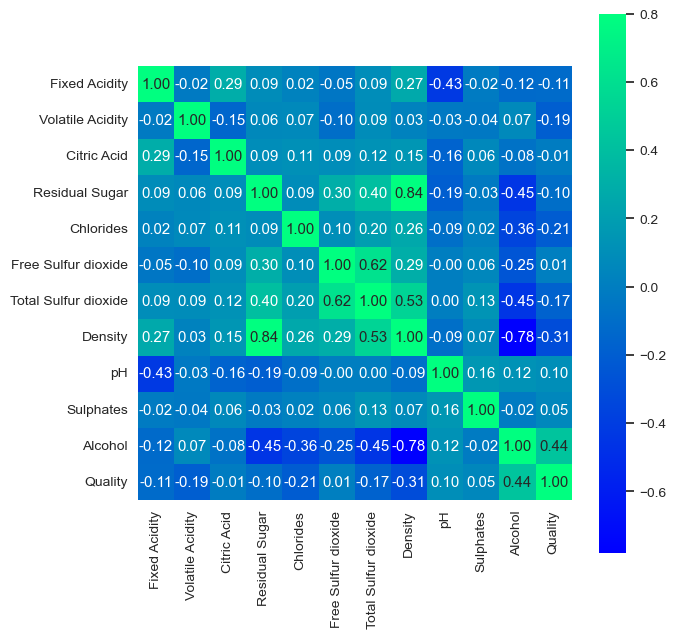

In [13]:
import matplotlib.pyplot as plt
import seaborn as sbn

corrmat = wine_data.corr()
f, ax = plt.subplots(figsize=(7, 7))
sbn.set(font_scale=0.9)
sbn.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f', cmap='winter')

!matplotlib inline
plt.show()

Сега да ја намалиме димензионалноста со користење на PCA. За почеток ќе ги оставиме сите 11 димензии

In [50]:
from sklearn.decomposition import PCA

pca = PCA(n_components=11, whiten=True)
X_reduced = pca.fit_transform(X)

Со explained_variance_ ја добиваме големината на варијанста која е опфатена со секој од PCA векторите

In [51]:
pca.explained_variance_

array([3.2229119 , 1.57556161, 1.22192081, 1.01873034, 0.97353334,
       0.93893321, 0.7267464 , 0.59948087, 0.41422824, 0.28954625,
       0.0206533 ])

За подобра анализа ќе користиме релативни броеви (во проценти).

In [52]:
pca.explained_variance_ratio_

array([0.29293217, 0.14320363, 0.11106103, 0.09259294, 0.08848496,
       0.08534014, 0.06605437, 0.05448713, 0.03764942, 0.02631701,
       0.00187719])

За да одредиме колку димензии треба да останат најдобро е графички да ги прикажеме овие резултати. На овој Scatter Plot може да се забележи лакт веќе кај втората димензија

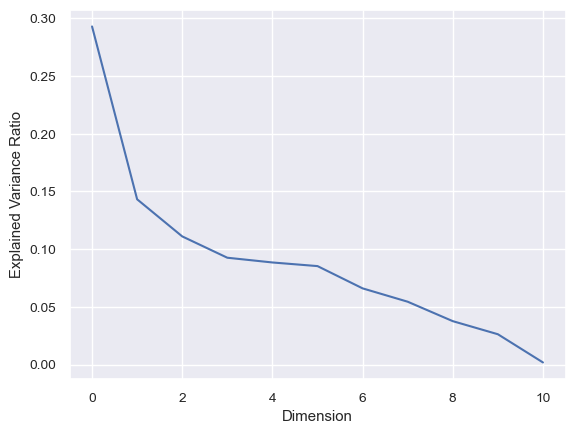

In [53]:
import matplotlib.pyplot as plt

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Dimension')
plt.ylabel('Explained Variance Ratio')
plt.show()

Точноста на класификаторт е иста, само извршивме трансформација, но не и намалување на димензионалноста

In [54]:
X_train, x_test, Y_train, y_test = train_test_split(X_reduced, Y, test_size=0.2, random_state=0)
clf_svc_pca = LinearSVC(penalty='l1', dual=False, tol=1e-3)
clf_svc_pca.fit(X_train, Y_train)

LinearSVC(dual=False, penalty='l1', tol=0.001)

In [55]:
accuracy = clf_svc_pca.score(x_test, y_test)
accuracy

0.49183673469387756

**Самостојна работа 1:** Променете го бројот на димензии кај PCA на 9 и одредете ја точноста на моделот за тест множеството
Дали добивте поголема точност?
Зошто е тоа така?
**Самостојна работа 2:** Променете го бројот на димензии кај PCA на 6 и одредете ја точноста на моделот за тест множеството
Дали добивте поголема точност?
Што добивте за сметка на точноста
**Самостојна работа 3:** Променете го бројот на димензии кај PCA на 1 и одредете ја точноста на моделот за тест множеството
Дали ова премногу ја намали точноста на моделот?
Дали тренирањето на моделот со намалена димензионалност ја зголемува брзината на тренирањето?

In [58]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6, whiten=True)
X_reduced = pca.fit_transform(X)

X_train, x_test, Y_train, y_test = train_test_split(X_reduced, Y, test_size=0.2, random_state=0)
clf_svc_pca = LinearSVC(penalty='l1', dual=False, tol=1e-3)
clf_svc_pca.fit(X_train, Y_train)

accuracy = clf_svc_pca.score(x_test, y_test)
accuracy

0.45714285714285713

In [59]:
X

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
        -1.24692128e+00, -3.49184257e-01, -1.39315246e+00],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
         7.40028640e-01,  1.34184656e-03, -8.24275678e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
         4.75101984e-01, -4.36815783e-01, -3.36667007e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -1.31315295e+00, -2.61552731e-01, -9.05543789e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
         1.00495530e+00, -9.62604939e-01,  1.85757201e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
         4.75101984e-01, -1.48839409e+00,  1.04489089e+00]])

In [60]:
X_reduced

array([[ 2.04815462, -0.43437485, -0.84170205, -1.12488836, -0.29680888,
        -0.92015852],
       [-0.35905245,  0.34318453, -0.32235299,  0.98988913, -0.72371909,
        -0.49922061],
       [ 0.08650094, -0.9478863 , -0.01585981,  0.26772383, -0.3726706 ,
        -0.5167069 ],
       ...,
       [-0.4343305 , -0.32542673, -0.601297  , -0.133521  , -0.8191928 ,
         0.13807351],
       [-1.89795692,  0.72955215, -0.24271348, -0.75508704, -0.08179508,
         0.51304725],
       [-1.57260336, -0.10431581,  0.19349449, -1.10285752, -0.89252546,
         0.56792271]])